## Linear inerpolation

In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/weather_data.csv")
print(data.shape)
data.head()

(9, 4)


,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain


In [7]:
newdata=data.interpolate()
newdata.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.00,Rain
1,1/4/2017,30.0,9.00,Sunny
2,1/5/2017,28.0,8.00,Snow
3,1/6/2017,30.0,7.00,NaN
4,1/7/2017,32.0,7.25,Rain


## FIllna()

In [9]:
newdata2=data.fillna(0)
newdata2.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain


In [12]:
fills={'temperature':0,'windspeed':0,'event':'no event'}
newdata2=data.fillna(fills)
newdata2.head()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,no event
4,1/7/2017,32.0,0.0,Rain


## Dropna()

## Dropping data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/weather_data.csv")
print(data.shape)
data.head()

(9, 4)


,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain


In [16]:
newdata=data.drop('day',axis=1)
newdata.head()

,temperature,windspeed,event
0,32.0,6.0,Rain
1,NaN,9.0,Sunny
2,28.0,NaN,Snow
3,NaN,7.0,NaN
4,32.0,NaN,Rain


In [17]:
newdata=data.drop(['day','temperature'],axis=1)
newdata.head()

,windspeed,event
0,6.0,Rain
1,9.0,Sunny
2,NaN,Snow
3,7.0,NaN
4,NaN,Rain


### dropping by index

In [32]:
data.set_index('day',inplace=True)
data.head()

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain


### Simple Linear Regression

In [37]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("E:/important notes and lectures/python/INVENTATEQ/datascience/datasets/salary_data.csv")
print(data.shape)
data.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [39]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


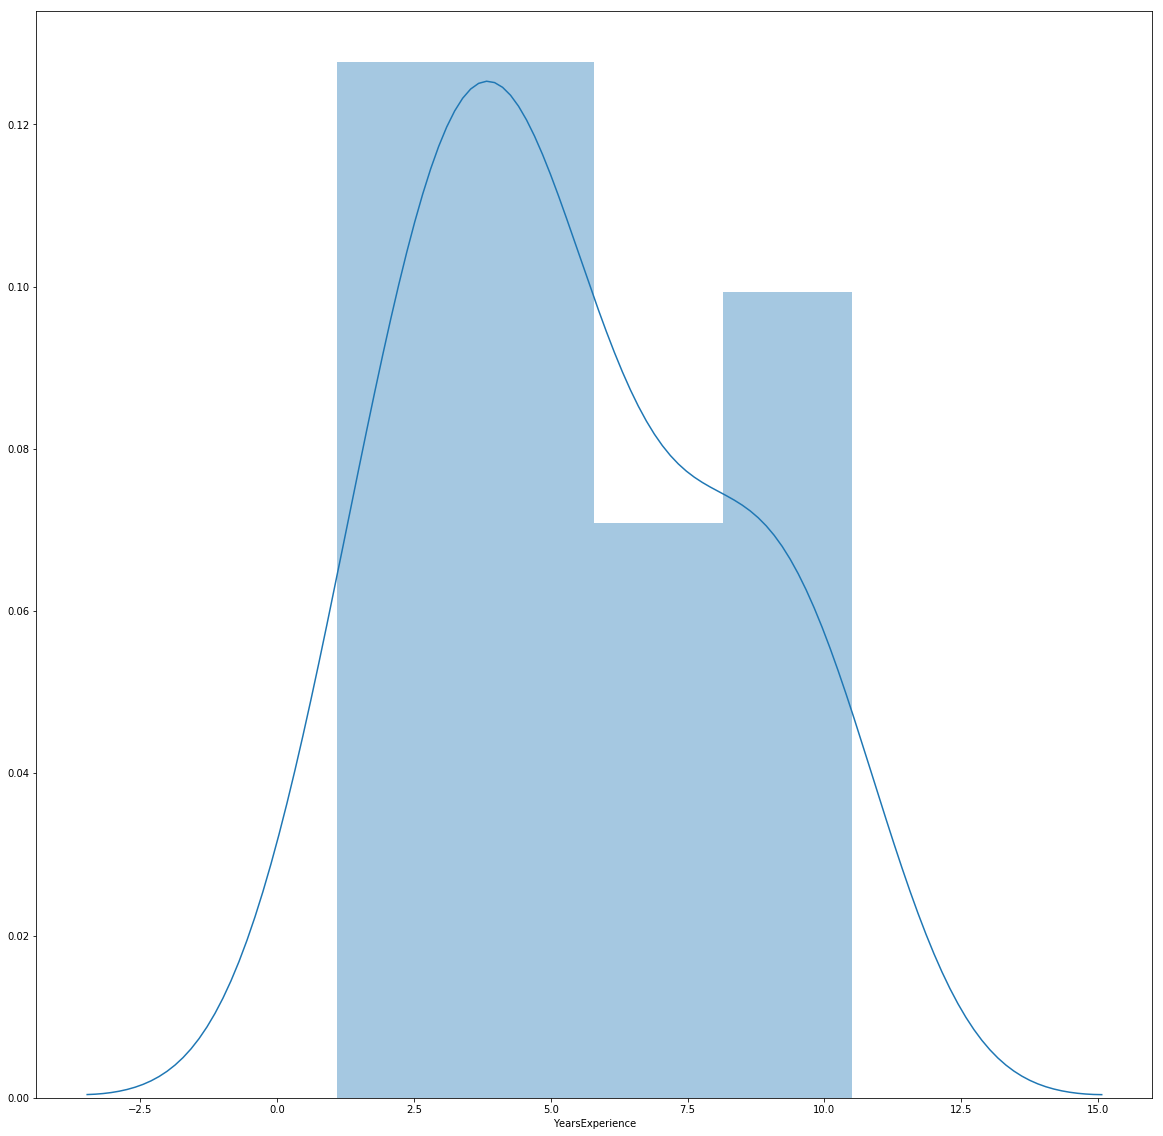

In [42]:
sb.distplot(data['YearsExperience'])

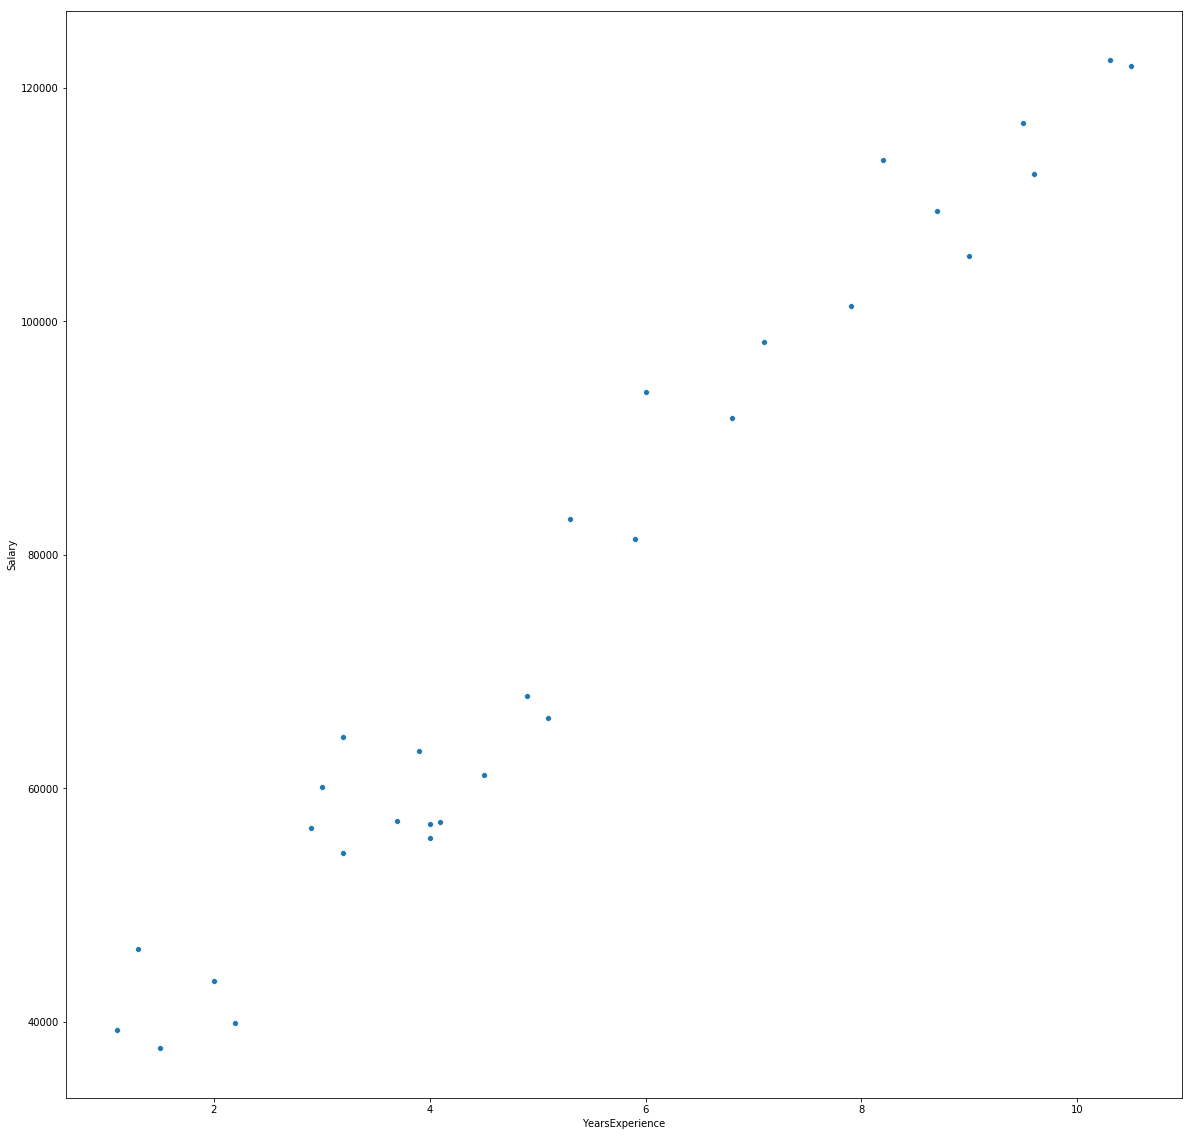

In [44]:
sb.scatterplot(data['YearsExperience'],data['Salary'])

In [51]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=0)

In [59]:
# Fitting Simple linear Regression to train data

from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# testing the score for the testing set

Regressor.score(X_test,Y_test)

0.988169515729126

In [63]:
# Prediction

Y_pred=Regressor.predict(X_test)
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [64]:
Regressor.predict(2.0)

array([45405.24940409])

Text(0,0.5,'Salary')

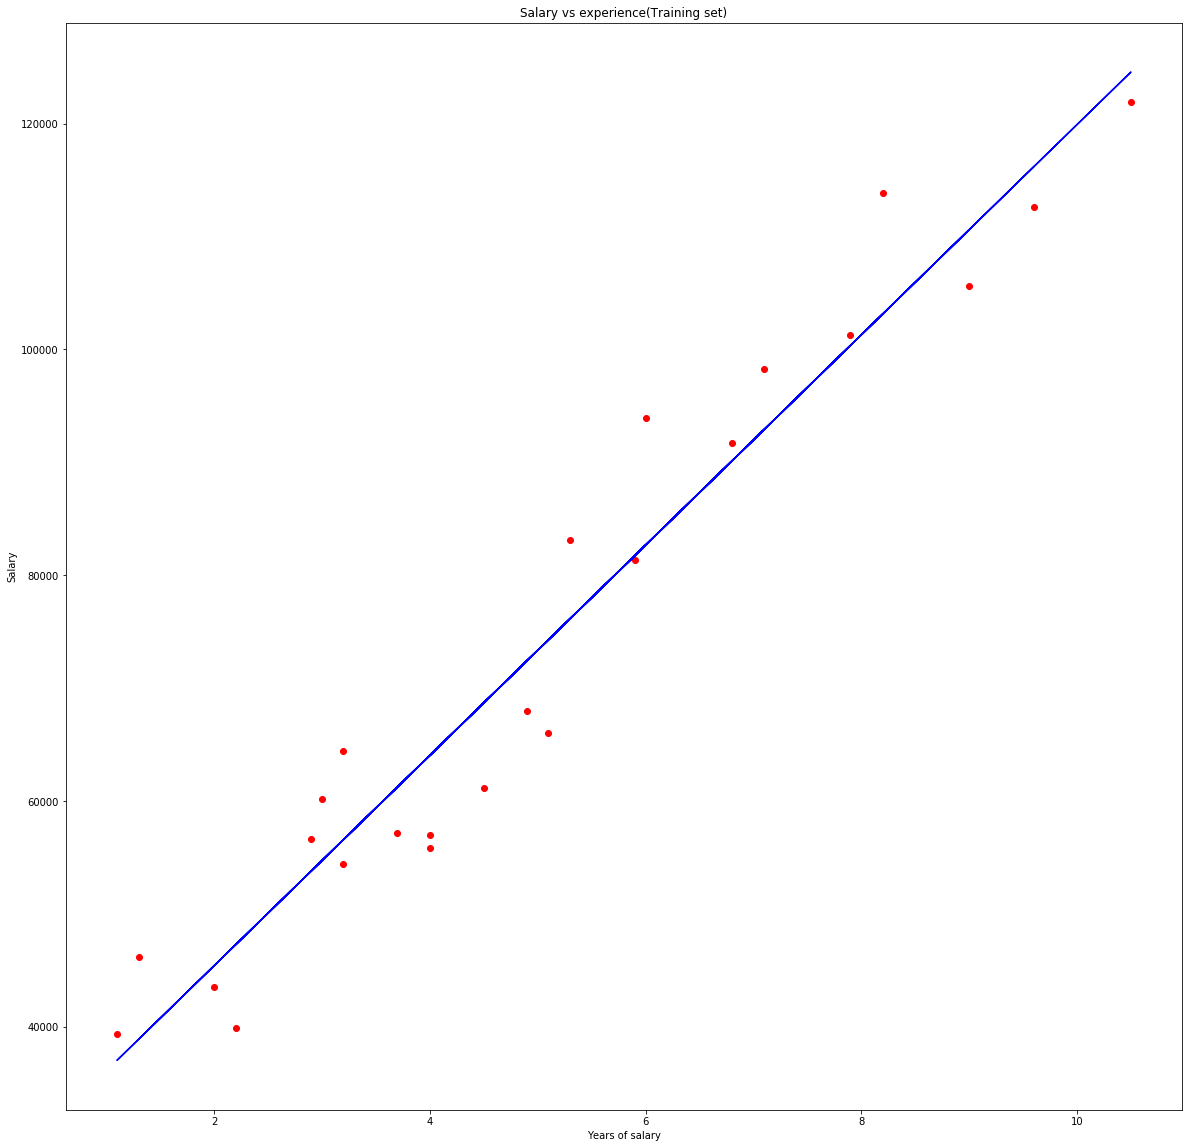

In [68]:
# Visualising the training set results

plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,Regressor.predict(X_train),color='blue')
plt.title('Salary vs experience(Training set)')
plt.xlabel('Years of salary')
plt.ylabel('Salary')

ValueError: x and y must have same first dimension, but have shapes (6, 1) and (24,)

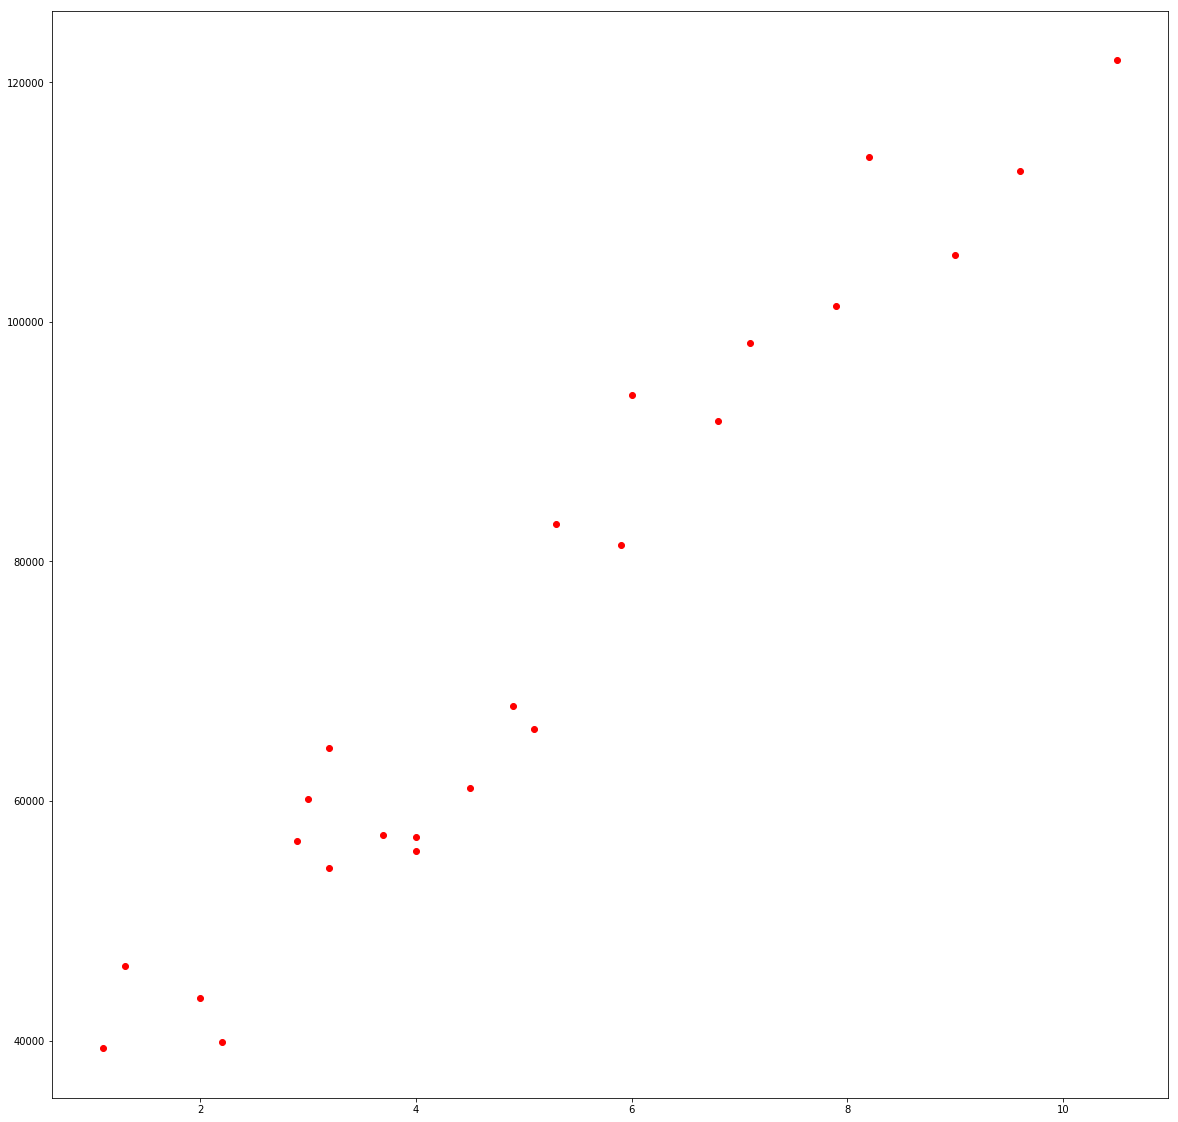

In [69]:
# Visualising the test set results

plt.scatter(X_train,Y_train,color='red')
plt.plot(X_test,Regressor.predict(X_train),color='blue')
plt.title('Salary vs experience(Training set)')
plt.xlabel('Years of salary')
plt.ylabel('Salary')

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(20.0,20.0)
data=pd.read_csv("C:/Users/pavan m sunder/datascience tutorials/datasets/50_Startups.csv")
print(data.shape)
data.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,4].values

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


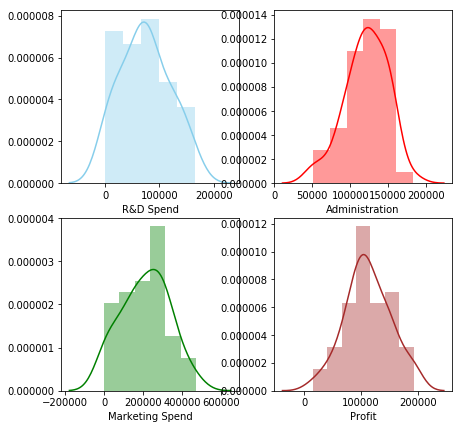

In [14]:
f, axes=plt.subplots(2,2,figsize=(7,7))
sb.distplot(data['R&D Spend'],color='skyblue',ax=axes[0,0])
sb.distplot(data['Administration'],color='red',ax=axes[0,1])
sb.distplot(data['Marketing Spend'],color='green',ax=axes[1,0])
sb.distplot(data['Profit'],color='brown',ax=axes[1,1])

In [15]:
pd.unique(X[:,3])

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [17]:
# Avoiding the dummy variable trap
X=X[:,1:]
X

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

In [19]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=0)

In [20]:
# Feature scaling
'''
from sklearn,preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_tranform(X_train)
X_test=sc_x.fit_tranform(X_test)
Y_train=sc_x.fit_tranform(Y_train)
'''

'\nfrom sklearn,preprocessing import StandardScaler\nsc_x=StandardScaler()\nX_train=sc_x.fit_tranform(X_train)\nX_test=sc_x.fit_tranform(X_test)\nY_train=sc_x.fit_tranform(Y_train)\n'

another way of feature scaling - Mean normalization feature scaling - formula = (x-x_mean)/(x_max-x_min)

In [21]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
        2.1463481e+05],
       [0.0000000e+00, 1.0000000e+00, 4.6014020e+04, 8.5047440e+04,
        2.0551764e+05],
       [1.0000000e+00, 0.0000000e+00, 7.5328870e+04, 1.4413598e+05,
        1.3405007e+05],
       [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 9.1749160e+04, 1.1417579e+05,
        2.9491957e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1994324e+05, 1.5654742e+05,
        2.5651292e+05],
       [0.0000000e+00, 1.0000000e+00, 1.0002300e+03, 1.2415304e+05,
        1.9039300e+03],
       [0.0000000e+00, 1.0000000e+00, 5.4205000e+02, 5.1743150e+04,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 6.5605480e+04, 1.5303206e+05,
        1.0713838e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.61

In [22]:
# Fitting Simple linear Regression to train data

from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# testing the score for the testing set

Regressor.score(X_test,Y_test)

0.9347068473282804

In [24]:
# Prediction

Y_pred=Regressor.predict(X_test)
Y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])